### Data Wrangling

Performing transformations in data to adapt to prediction models.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('hotel_bookings.csv')

Checking for the existence of null values in each variable.

In [3]:
def num_missing(x):
    return sum(x.isnull())

#applying in collumns
print('Number of missing values by collumns:')
print(data.apply(num_missing, axis = 0))

Number of missing values by collumns:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent              

The "agent" and "company" variables have many null values and do not seem to be significant for the model, so I performed the removal.

In [ ]:
data = data.drop(['agent', 'company'], axis=1)

Analyzing the lead time variable distribution earlier, I noticed an asymmetric distribution. I decided to check for outliers and perform a logarithmic normalization process.

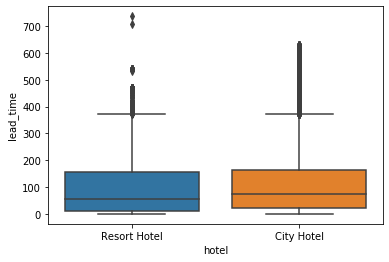

In [27]:
#checking outliers in lead_time variable
sns.boxplot(data['hotel'], data['lead_time'], orient="v")

In [5]:
leadtime = data.iloc[:, 2]
leadtime_zero = []
for value in leadtime:
    if value == 0:
        leadtime_zero.append(leadtime)

print('Zero values: ', + len(leadtime_zero))

Zero values:  6345


In [6]:
leadtime_log = []
for value in leadtime:
    if value == 0:
        leadtime_log.append(np.log(value+1))
    else:
        leadtime_log.append(np.log(value))
        
#checking if persists the same samples size
print(len(leadtime_log))

119390


In [7]:
leadtime_log = np.asarray(leadtime_log)
print(leadtime_log)

[5.83481074 6.60258789 1.94591015 ... 3.52636052 4.69134788 5.32300998]


In [8]:
data['lead_time_log'] = leadtime_log

In [22]:
data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_time_log
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,5.834811
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,6.602588
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.945910
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2.564949
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.639057
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.639057
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,107.0,0,0,Check-Out,2015-07-03,0.000000
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,103.0,0,1,Check-Out,2015-07-03,2.197225
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,No Deposit,0,Transient,82.0,0,1,Canceled,2015-05-06,4.442651
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,0,No Deposit,0,Transient,105.5,0,0,Canceled,2015-04-22,4.317488


Text(0.5, 1.0, 'lead_time with log')

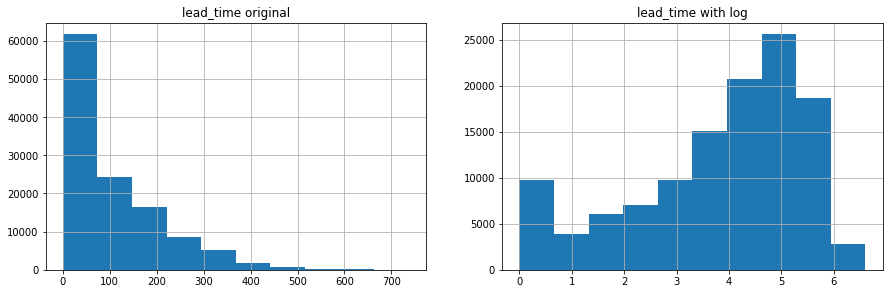

In [15]:
#comparing lead_time before and after log normalization
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
data['lead_time'].hist()
plt.title('lead_time original')

plt.subplot(2,2,2)
data['lead_time_log'].hist()
plt.title('lead_time with log')

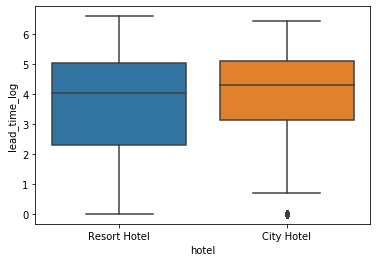

In [29]:
#checking if the outliers still persists.
sns.boxplot(data['hotel'], data['lead_time_log'], orient="v")

Replacing missing values in children variable by the mean and country variable by the mode.

In [28]:
data['children'].fillna(data['children'].mean(), inplace=True)
data['country'].fillna(data['country'].mode()[0], inplace=True)

#verifying missing values
print(data.apply(num_missing, axis = 0))

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [30]:
data = data.drop(['lead_time', 'reservation_status_date'], axis=1)

In [32]:
data.head(10)

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,lead_time_log
0,Resort Hotel,0,2015,July,27,1,0,0,2,0.0,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,5.834811
1,Resort Hotel,0,2015,July,27,1,0,0,2,0.0,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,6.602588
2,Resort Hotel,0,2015,July,27,1,0,1,1,0.0,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,1.945910
3,Resort Hotel,0,2015,July,27,1,0,1,1,0.0,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2.564949
4,Resort Hotel,0,2015,July,27,1,0,2,2,0.0,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2.639057
5,Resort Hotel,0,2015,July,27,1,0,2,2,0.0,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2.639057
6,Resort Hotel,0,2015,July,27,1,0,2,2,0.0,...,C,0,No Deposit,0,Transient,107.0,0,0,Check-Out,0.000000
7,Resort Hotel,0,2015,July,27,1,0,2,2,0.0,...,C,0,No Deposit,0,Transient,103.0,0,1,Check-Out,2.197225
8,Resort Hotel,1,2015,July,27,1,0,3,2,0.0,...,A,0,No Deposit,0,Transient,82.0,0,1,Canceled,4.442651
9,Resort Hotel,1,2015,July,27,1,0,3,2,0.0,...,D,0,No Deposit,0,Transient,105.5,0,0,Canceled,4.317488


In [54]:
#saving new data
data.to_csv(r'.\modified_hotelbookings.csv', index=False, header=True)